In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.lines import Line2D

import numpy as np
from scipy.stats import gaussian_kde

## set default matplotlib font and font size
typeface='normal'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

import imp,os
from itertools import permutations

bt=imp.load_source('baltic_bacter','/Users/jugne/Documents/SCORE-paper/visualisation_code/baltic_bacter.py')

In [5]:
segments=['HA','NA']
translate={i:segments.index(x) for i,x in enumerate(sorted(segments))}

colourSwitches=[mpl.cm.Greys(i) for i in np.linspace(0.4,0.8,3)]

colours={'Galliformes':(0.2981622478541206, 0.44644367598435458, 0.64719724652229571),
        'Anseriformes':(0.28098424626331703, 0.63955403192370541, 0.39507882933990629)}

colours_seg={'HA':(0.88366013765335083, 0.77908497055371606, 0.18562091886997223),
            'NA':(0.502, 0, 0.125)}

In [26]:
for run in range(1,11):
    for u in range(1,4):
        print(u)
        if u==1:
            tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/combined/h5n1_maxPost.typed.network.trees'
#            tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/combined/h5n1_mcc.typed.network.trees'
#        if u==2:
#            tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/root_filter_max/h5n1_mcc.typed.network.trees'
#        if u==3:
#            tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/segment_root_filter_max/h5n1_mcc.typed.network.trees'


            #tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/combined/h5n1_mcc.typed.network.trees'
#tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/output/root_filter_max/h5n1_mcc.typed.network.trees'
#tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/output/segment_root_filter_max/h5n1_mcc.typed.network.trees'
        ll=bt.loadNexus(tree_path,date_fmt='%Y-%m-%d',verbose=False) ## load tree
        ll.drawTree()

        fig = plt.figure(figsize=(15, 15),facecolor='w') ## new figure
        gs = gridspec.GridSpec(2,2,height_ratios=[1,6],width_ratios=[1,4],wspace=0.2,hspace=0.1)
        ax=plt.subplot(gs[1,0:],facecolor='w') ## first subplot - tree
#        posteriorCutoff=lambda k: k.traits['posterior']>0.0 ## define cutoff for removing reassortment events

#        keep=set(list(filter(posteriorCutoff,ll.getBranches(lambda k: isinstance(k,bt.reticulation))))+ll.getExternal(lambda k: isinstance(k,bt.leaf))) ## remove reassortment at a given cutoff

#        ll=ll.reduceTree(keep) ## reduce tree down to those that pass posterior cutoff

        for k in ll.Objects: ## iterate over branches
            x=k.absoluteTime
            xp=k.parent.absoluteTime
            y=k.y

            ax.plot([x,xp],[y,y],color=colours[k.traits['state']],lw=2,zorder=0)
    
            if isinstance(k,bt.reticulation)==True:         
                #if posteriorCutoff(k): ## passes posterior threshold
                segs=sorted(map(int,k.traits['segments'])) ## get travelling segment(s)

                c='k'
                s=20
                for i in range(len(segs)):
                    name=segments[translate[segs[i]]] ## get name of segment
                    c=colours_seg[name] ## get appropriate colour
                    o=1/20.
            
                    ax.plot([x,xp],[y,y],color=c,lw=3,ls=(0, (5, 10)),zorder=0)
                    ax.plot([x+o*i,x+o*i],[y,k.target.y],color=colours[k.traits['state']],lw=3,ls='-',zorder=1)
                    ax.plot([x+o*i,x+o*i],[y,k.target.y],color=c,lw=3,ls=(0, (5, 10)),zorder=1) ## plot vertical lineage leaving donor and heading to recipient
                ##ax.scatter(x+o*i,k.target.y,s=s,facecolor=colours[k.traits['state']],edgecolor='none',zorder=3) ## plot circles
                ##ax.scatter(x+o*i,k.target.y,s=s*2,facecolor='k',edgecolor='none',zorder=2)
                
    
            if k.branchType=='node': ## if node - plot vertical bar
                left,right=k.children[-1].y,k.children[0].y
                ax.plot([x,x],[left,right],color=colours[k.traits['state']],lw=2,zorder=0)
            elif isinstance(k,bt.leaf): ## if actual leaf - add circle
                ax.scatter(x,y,s=20,facecolor=colours[k.traits['state']],edgecolor='none',zorder=4)
                ax.scatter(x,y,s=40,facecolor='k',edgecolor='none',zorder=3)
    

        [ax.spines[loc].set_visible(False) for loc in ax.spines if loc!='bottom'] ## remove axis spines

        timewidth=1
        [ax.axvspan(i,i+timewidth,facecolor='lightgrey',edgecolor='none',alpha=0.2) for i in range(int(1995),int(ll.root.absoluteTime+ll.treeHeight+1),2*timewidth)] ## add timeline

        ax.tick_params(axis='y',size=0,labelsize=0)
        ax.tick_params(axis='x',size=0,labelsize=28)
        ax.set_ylim(-1,ll.ySpan+1)
        custom_lines = []
        names = []
        for col in colours:
            custom_lines.append(Line2D([0], [0], color=colours[col], lw=4))
            names.append(col) 

        for col_s in colours_seg:
            custom_lines.append(Line2D([0], [0], color=colours_seg[col_s], lw=4, ls='--'))
            names.append(col_s) 

#         if run==10:
#             ax.legend(custom_lines, names, prop=dict(size=25))
            

        plt.title('Subset '+ str(run))


#         plt.show()
        if u==1:
            figname = '/Users/jugne/Documents/score-text/figures/no_filter/networks/run'+str(run)+'_h5n1_maxPost.pdf'
#            figname =  '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/combined/h5n1_mcc.pdf'
#        if u==2:
#            figname = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/root_filter_max/h5n1_root_filter_mcc.pdf'
#        if u==3:
#            figname = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/segment_root_filter_max/h5n1_segment_root_filter_mcc.pdf'
        fig.savefig(figname, bbox_inches='tight')
        plt.close(fig)

1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3
1
2
3


1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


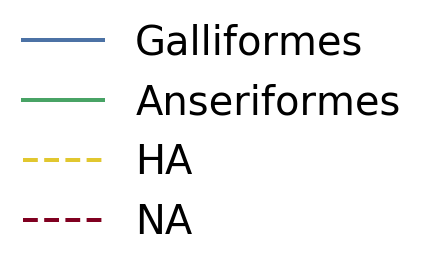

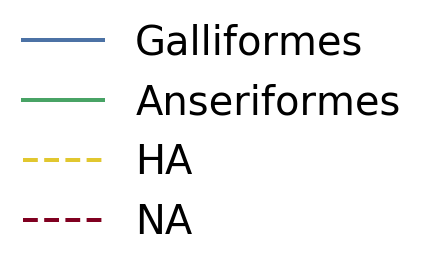

In [27]:
for run in range(1,11):
    for u in range(1,3):
        print(u)
        if u==1:
            tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/combined/h5n1_mcc.typed.network.trees'
#         if u==2:
#             tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/root_filter_max/h5n1_mcc.typed.network.trees'
        if u==2:
            tree_path = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/segment_root_filter_max/h5n1_mcc.typed.network.trees'


            #tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/combined/h5n1_mcc.typed.network.trees'
#tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/output/root_filter_max/h5n1_mcc.typed.network.trees'
#tree_path='/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_1/output/segment_root_filter_max/h5n1_mcc.typed.network.trees'
        ll=bt.loadNexus(tree_path,date_fmt='%Y-%m-%d',verbose=False) ## load tree
        ll.drawTree()

        fig = plt.figure(figsize=(15, 15),facecolor='w') ## new figure
        gs = gridspec.GridSpec(2,2,height_ratios=[1,6],width_ratios=[1,4],wspace=0.2,hspace=0.1)
        ax=plt.subplot(gs[1,0:],facecolor='w') ## first subplot - tree
#        posteriorCutoff=lambda k: k.traits['posterior']>0.0 ## define cutoff for removing reassortment events

#        keep=set(list(filter(posteriorCutoff,ll.getBranches(lambda k: isinstance(k,bt.reticulation))))+ll.getExternal(lambda k: isinstance(k,bt.leaf))) ## remove reassortment at a given cutoff

#        ll=ll.reduceTree(keep) ## reduce tree down to those that pass posterior cutoff

        for k in ll.Objects: ## iterate over branches
            x=k.absoluteTime
            xp=k.parent.absoluteTime
            y=k.y

            ax.plot([x,xp],[y,y],color=colours[k.traits['state']],lw=2,zorder=0)
    
            if isinstance(k,bt.reticulation)==True:         
                #if posteriorCutoff(k): ## passes posterior threshold
                segs=sorted(map(int,k.traits['segments'])) ## get travelling segment(s)

                c='k'
                s=20
                for i in range(len(segs)):
                    name=segments[translate[segs[i]]] ## get name of segment
                    c=colours_seg[name] ## get appropriate colour
                    o=1/20.
            
                    ax.plot([x,xp],[y,y],color=c,lw=3,ls=(0, (5, 10)),zorder=0)
                    ax.plot([x+o*i,x+o*i],[y,k.target.y],color=colours[k.traits['state']],lw=3,ls='-',zorder=1)
                    ax.plot([x+o*i,x+o*i],[y,k.target.y],color=c,lw=3,ls=(0, (5, 10)),zorder=1) ## plot vertical lineage leaving donor and heading to recipient
                ##ax.scatter(x+o*i,k.target.y,s=s,facecolor=colours[k.traits['state']],edgecolor='none',zorder=3) ## plot circles
                ##ax.scatter(x+o*i,k.target.y,s=s*2,facecolor='k',edgecolor='none',zorder=2)
                
    
            if k.branchType=='node': ## if node - plot vertical bar
                left,right=k.children[-1].y,k.children[0].y
                ax.plot([x,x],[left,right],color=colours[k.traits['state']],lw=2,zorder=0)
            elif isinstance(k,bt.leaf): ## if actual leaf - add circle
                ax.scatter(x,y,s=20,facecolor=colours[k.traits['state']],edgecolor='none',zorder=4)
                ax.scatter(x,y,s=40,facecolor='k',edgecolor='none',zorder=3)
    

        [ax.spines[loc].set_visible(False) for loc in ax.spines if loc!='bottom'] ## remove axis spines

        timewidth=1
        [ax.axvspan(i,i+timewidth,facecolor='lightgrey',edgecolor='none',alpha=0.2) for i in range(int(1995),int(ll.root.absoluteTime+ll.treeHeight+1),2*timewidth)] ## add timeline

        ax.tick_params(axis='y',size=0,labelsize=0)
        ax.tick_params(axis='x',size=0,labelsize=28)
        ax.set_ylim(-1,ll.ySpan+1)
        custom_lines = []
        names = []
        for col in colours:
            custom_lines.append(Line2D([0], [0], color=colours[col], lw=4))
            names.append(col) 

        for col_s in colours_seg:
            custom_lines.append(Line2D([0], [0], color=colours_seg[col_s], lw=4, ls='--'))
            names.append(col_s) 

#         if run==10:
#             ax.legend(custom_lines, names, prop=dict(size=25))
#             label_params = ax.get_legend_handles_labels() 

 

        plt.title('Subset '+ str(run))
#         plt.show()
        if u==1:
            figname =  '/Users/jugne/Documents/score-text/figures/no_filter/networks/run_'+str(run)+'_h5n1_mcc.pdf'
#         if u==2:
#             figname = '/Users/jugne/Documents/SCORE-paper/FullDatesInference/current/h5n1_reject_30DaysDiff_08_16/run_'+str(run)+'/output/root_filter_max/h5n1_root_filter_mcc.pdf'
        if u==2:
            figname = '/Users/jugne/Documents/score-text/figures/no_filter/networks/run_'+str(run)+'_h5n1_segment_root_filter_mcc.pdf'
        fig.savefig(figname, bbox_inches='tight')
        plt.close(fig)
        
        if run==10:
            figl, axl = plt.subplots()
            axl.axis(False)
            axl.legend(custom_lines, names , loc="center", prop={"size":40}, frameon=False)
            figl.savefig("Network_label_only.pdf")

In [23]:
print(range(1,4))

range(1, 4)


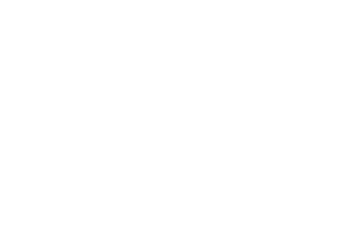

In [14]:
label_params = ax.get_legend_handles_labels() 

figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":50}, frameon=False)
figl.savefig("LABEL_ONLY.png")